## Wrapper Method


 ### the best FS vis ACC 80% by Forward Selection
 
 ## FBS', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR', 'LDH', 'Na', 'CL'
 
 ## FS=9


The main idea behind a wrapper method is to select which set of features works best for a machine learning model.
It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion.
The evaluation criterion is simply the performance measure which depends on the type of problem, for e.g. For regression evaluation criterion can be MSE,MAE,MAPE,R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score, etc. It selects the combination of features that gives the optimal results for the specified machine learning algorithm.

1. Forward Selection

Forward selection is an iterative method in each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

2. Backward Selection

In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

3. Exhaustive Feature Selection

This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

Forward Feature Selection
In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models.

Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models.

Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a higest arruracy for classificartion and minimum MSE/MAPE/MAE for regression models of individual features.


## Forward Feature Selection for Classification Problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Befoure missing values

BC = pd.read_csv('bc_with_mis_90.csv')
BC.shape

(2437, 23)

In [3]:
## After missing values

BC.isnull().sum()

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)

BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,...,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,...,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,...,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,...,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,...,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.900000,9.5,63.0,23.0,...,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.200000,8.8,82.0,23.0,...,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.400000,8.1,22.0,15.0,...,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.900000,8.2,51.0,17.0,...,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [4]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 23 columns):
Sex          2437 non-null int64
Age          2437 non-null int64
Adress       2437 non-null object
FBS          2437 non-null float64
Urea         2437 non-null float64
Creatinin    2437 non-null float64
ALB          2437 non-null float64
TCa          2437 non-null float64
GPT          2437 non-null float64
GOT          2437 non-null float64
ALP          2437 non-null float64
CA15         2437 non-null float64
CEA          2437 non-null float64
WBC          2437 non-null float64
RBC          2437 non-null float64
HGB          2437 non-null float64
PLT          2437 non-null float64
ESR          2437 non-null float64
LDH          2437 non-null float64
Na           2437 non-null float64
K            2437 non-null float64
CL           2437 non-null float64
CLASS        2437 non-null int64
dtypes: float64(19), int64(3), object(1)
memory usage: 438.0+ KB


In [5]:
BC.isnull().sum()

Sex          0
Age          0
Adress       0
FBS          0
Urea         0
Creatinin    0
ALB          0
TCa          0
GPT          0
GOT          0
ALP          0
CA15         0
CEA          0
WBC          0
RBC          0
HGB          0
PLT          0
ESR          0
LDH          0
Na           0
K            0
CL           0
CLASS        0
dtype: int64

In [6]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,...,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,...,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,...,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,...,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,...,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.900000,9.5,63.0,23.0,...,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.200000,8.8,82.0,23.0,...,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.400000,8.1,22.0,15.0,...,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.900000,8.2,51.0,17.0,...,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


## outlires by Z-score


In [7]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())



In [8]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [9]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan

BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


In [10]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()


Sex           0
Age           0
Adress        0
FBS          50
Urea         66
Creatinin    27
ALB          60
TCa           8
GPT          61
GOT          43
ALP          28
CA15          3
CEA           1
WBC          13
RBC           4
HGB           3
PLT           3
ESR          30
LDH          12
Na            1
K             8
CL            3
CLASS         0
dtype: int64

In [11]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,...,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,...,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,...,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,...,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,...,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,...,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,...,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,...,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,...,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


In [13]:
X = BC.iloc[:,0:-1]
y = BC["CLASS"]
X.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,24,200.00000,23.0,0.8,3.400000,1.0,2.0,1.0,...,8.02,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1
1,1,53,19,154.36173,22.0,0.7,4.461508,9.6,3.0,7.0,...,7.91,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1
2,1,50,19,154.36173,27.0,0.6,3.500000,9.3,11.0,17.0,...,8.74,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4
3,1,36,17,300.00000,15.0,1.1,4.200000,8.5,13.0,1.0,...,10.34,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1
4,1,30,17,345.00000,2.0,1.0,3.000000,8.0,7.0,13.0,...,7.31,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1


In [14]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(2437, 22)
(2437,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


!pip install mlxtend


In [15]:
# Lets use the built in function in Python

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

from sklearn.tree import DecisionTreeClassifier as D_classifier

In [16]:

feature_names=tuple(X.columns)
feature_names

('Sex',
 'Age',
 'Adress',
 'FBS',
 'Urea',
 'Creatinin',
 'ALB',
 'TCa',
 'GPT',
 'GOT',
 'ALP',
 'CA15',
 'CEA',
 'WBC',
 'RBC',
 'HGB',
 'PLT',
 'ESR',
 'LDH',
 'Na',
 'K',
 'CL')

In [17]:
X.shape, y.shape

((2437, 22), (2437,))

In [18]:
sfs1 = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           #LGR(max_iter=1000),
           D_classifier(random_state=0),
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=10)


In [19]:
sfs1 = sfs1.fit(X, y,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.7s finished

[2022-03-23 09:42:11] Features: 1/22 -- score: 0.6956615684120238[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.1s finished

[2022-03-23 09:42:12] Features: 2/22 -- score: 0.7197699452175123[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.4s finished

[2022-03-23 09:42:14] Features: 3/22 -- score: 0.7615314314351525[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [20]:
sfs1.subsets_

{1: {'feature_idx': (14,),
  'cv_scores': array([0.82857143, 0.86885246, 0.93032787, 0.75409836, 0.75      ,
         0.58196721, 0.59670782, 0.63374486, 0.60082305, 0.41152263]),
  'avg_score': 0.6956615684120238,
  'feature_names': ('RBC',)},
 2: {'feature_idx': (12, 14),
  'cv_scores': array([0.49795918, 0.76229508, 0.79508197, 0.77868852, 0.81557377,
         0.81147541, 0.72016461, 0.68312757, 0.82716049, 0.50617284]),
  'avg_score': 0.7197699452175123,
  'feature_names': ('CEA', 'RBC')},
 3: {'feature_idx': (12, 14, 21),
  'cv_scores': array([0.60816327, 0.89344262, 0.81147541, 0.82786885, 0.92213115,
         0.80737705, 0.781893  , 0.65843621, 0.80246914, 0.50205761]),
  'avg_score': 0.7615314314351525,
  'feature_names': ('CEA', 'RBC', 'CL')},
 4: {'feature_idx': (12, 14, 17, 21),
  'cv_scores': array([0.62857143, 0.88934426, 0.81557377, 0.81147541, 0.89754098,
         0.8647541 , 0.80246914, 0.67489712, 0.79423868, 0.51851852]),
  'avg_score': 0.7697383409951717,
  'feature_

In [21]:
sfs1.get_metric_dict()

{1: {'feature_idx': (14,),
  'cv_scores': array([0.82857143, 0.86885246, 0.93032787, 0.75409836, 0.75      ,
         0.58196721, 0.59670782, 0.63374486, 0.60082305, 0.41152263]),
  'avg_score': 0.6956615684120238,
  'feature_names': ('RBC',),
  'ci_bound': 0.11150026792956481,
  'std_dev': 0.15012565464387767,
  'std_err': 0.050041884881292555},
 2: {'feature_idx': (12, 14),
  'cv_scores': array([0.49795918, 0.76229508, 0.79508197, 0.77868852, 0.81557377,
         0.81147541, 0.72016461, 0.68312757, 0.82716049, 0.50617284]),
  'avg_score': 0.7197699452175123,
  'feature_names': ('CEA', 'RBC'),
  'ci_bound': 0.08669061840263595,
  'std_dev': 0.11672156561452945,
  'std_err': 0.03890718853817648},
 3: {'feature_idx': (12, 14, 21),
  'cv_scores': array([0.60816327, 0.89344262, 0.81147541, 0.82786885, 0.92213115,
         0.80737705, 0.781893  , 0.65843621, 0.80246914, 0.50205761]),
  'avg_score': 0.7615314314351525,
  'feature_names': ('CEA', 'RBC', 'CL'),
  'ci_bound': 0.092692622316421

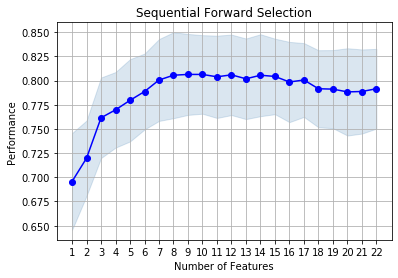

In [22]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()



In [23]:
# Lets access the indices of the best features directly via the k_feature_idx_ attribute:
sfs1.k_feature_names_, sfs1.k_feature_idx_

(('FBS', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR', 'LDH', 'Na', 'CL'),
 (3, 12, 13, 14, 16, 17, 18, 19, 21))

In [24]:
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
df[["feature_idx","avg_score"]]

,feature_idx,avg_score
1,"(14,)",0.695662
2,"(12, 14)",0.71977
3,"(12, 14, 21)",0.761531
4,"(12, 14, 17, 21)",0.769738
5,"(12, 14, 17, 18, 21)",0.779591
6,"(3, 12, 14, 17, 18, 21)",0.788646
7,"(3, 12, 14, 16, 17, 18, 21)",0.800567
8,"(3, 12, 14, 16, 17, 18, 19, 21)",0.805529
9,"(3, 12, 13, 14, 16, 17, 18, 19, 21)",0.806354
10,"(2, 3, 12, 13, 14, 16, 17, 18, 19, 21)",0.806333
